In [3]:
# <div style="border-radius:10px; border:#CD5C5C solid; padding: 15px; background-color: #FFFAF1; font-size:100%; text-align:left">
# <div style="color:white;
#            display:fill;
#            border-radius:5px;
#            background-color:pink;
#            font-size:200%;
#            font-family:Serif;
#            letter-spacing:0.5px">

# <p style="padding: 10px;
#           color:black;
#           font-size:120%;
#           text-align:center;">
# Project :Credit Card Fraud Detection
# </p>
# </div>



# 🌟Work Flow:

 - Step 1: Importing the required libraries
 

 - Step 2: Loading the Data Set
 

 - Step 3: Basic Understanding of Data
 

 - Step 4: Preprocessing : Data Cleaning
 

 - Step 5: Exploratory Data Analysis and Insights
 

 - Step 6: Preprocessing: Data Preparation for Modelling
 

 - Step 7: Model Building and Validation
 

 - Conclusion and Future Scope
 

#                             Step 1: Importing the Required libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV


from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# import xgboost as xgb


from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgboost (from versions: none)
ERROR: No matching distribution found for xgboost


#               Step 2: Loading the DataSet

In [22]:
df=pd.read_csv("creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


#              Step 3: Basic Understanding of Data

In [23]:
df.shape

(568630, 31)

Observation:

There are total 568630 Records/Rows in the dataset.

There are total 31 Features/columns in the dataset.

In [17]:
# <div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

# <h3 align="left"><font color=brown>Observation:</font></h3>

# * There are total **568630 Records/Rows** in the dataset. 
# * There are total **31 Features/columns** in the dataset.

In [4]:
pd.set_option('display.max_columns', None)

## Preview

In [24]:
df.sample(2)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118722,118722,-0.006544,-1.951053,0.105640,-0.492766,-0.280416,0.325314,0.811809,-0.235165,0.054603,0.662130,-1.032214,0.475438,-0.250082,0.938920,0.416472,-0.320225,0.686727,0.623522,-1.244174,1.201116,-0.039734,-1.018915,-0.819786,0.363007,-0.111193,2.017615,-0.499032,0.292018,22161.57,0
126012,126012,-0.154141,-0.203320,0.468791,-1.144720,1.275748,2.322510,0.347382,0.115416,0.491918,0.508417,-0.928613,0.535802,0.103716,0.718287,0.872348,1.356305,0.075738,0.780768,-0.958180,-0.358294,-0.086002,-0.156147,-0.077216,2.130286,-0.351168,-1.832782,-0.833987,-0.627412,11671.79,0


## Fetching columns names and types

In [6]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## basic information of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

###### From above output we can observe that majority of the columns are float types  and only 2 columns are of integer type

In [8]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# STEP 4: Preprocessing

## 4.1 cleaning and handling missing values

In [9]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## CHECKING FOR ANY DUPLICATE

In [10]:
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []


### 📚 OBSERVATIONS :-
#### -> NO NULL VALUES.
#### -> NO DUPLICATE VALUES
#### -> NO CATEGORICAL DATA

In [33]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ydata-profiling (from versions: none)
ERROR: No matching distribution found for ydata-profiling


In [2]:
#PROFILEREPORT
# from ydata_profiling import ProfileReport

In [3]:
# ProfileReport(df)

# Step 5: Exploratory Data Analysis and Insights

### SPLITTING THE DATA :

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score 


In [32]:
sam=df.sample(n=5000)
sam

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
538448,538448,-0.292751,-0.890428,0.252533,0.052168,-0.518660,0.897051,1.378729,-0.138858,0.511951,-0.151744,-0.385577,-0.011424,-1.072985,-0.092086,0.539437,-0.281242,0.478416,0.146605,0.341633,1.504798,0.119806,0.250628,1.807812,0.447919,0.245982,-0.547213,-0.411522,-0.206936,15611.78,1
522664,522664,-0.459440,0.726260,-0.833268,1.080433,-0.141238,-0.797511,-0.553196,0.110315,-0.918579,-1.028598,1.629143,-1.427178,2.031556,-1.253417,-1.579333,-1.390493,-1.241082,-1.024098,0.991646,0.690139,0.366606,0.786685,-0.412855,-0.681736,0.532537,0.321698,0.406989,-0.101112,14150.67,1
92801,92801,-0.065297,-0.383592,0.620098,-0.132324,0.219943,0.399902,0.933380,-0.190768,0.433786,0.609930,-0.945648,0.690078,-0.069618,0.786589,0.442782,0.012769,0.559312,-0.041953,-0.027001,-0.189354,-0.081265,0.471399,0.030553,0.266505,-0.618106,-0.698761,0.272510,0.039852,6647.77,0
265884,265884,-0.176311,-0.099160,0.905470,-0.449075,0.827267,-0.069981,1.161348,-0.280348,0.516612,0.534806,-0.826591,0.380910,-0.237120,0.104732,-0.005907,0.454175,0.564347,0.260197,-0.654387,0.055459,-0.321651,-0.838587,-0.185622,-0.316127,1.481601,-2.066122,-0.385790,-0.804104,3061.98,0
573,573,0.699679,-0.775841,0.528081,-0.456034,-0.017062,0.221941,0.473140,-0.180407,0.967566,0.446803,-1.469739,0.616596,-0.423255,0.700456,-0.008558,0.488157,0.422942,-0.020600,0.233669,0.219700,-0.185983,-0.904060,-0.197425,-0.082192,0.212218,1.716668,-0.366731,0.000627,6304.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40143,40143,0.957701,-0.413496,0.615309,-0.143832,0.245714,0.646462,0.390795,-0.102570,0.633266,0.633176,-0.246722,1.016067,-1.221321,0.985308,-0.716120,0.258885,0.426385,0.167267,-0.166704,-0.426576,-0.139044,-0.125975,-0.119598,-0.539681,0.995274,-0.726303,-0.203588,-0.102835,8901.59,0
410981,410981,-2.382607,3.617115,-2.200561,1.807602,-2.576321,1.650573,-3.630459,-4.250881,-3.208425,-2.948204,0.931756,-1.457108,-2.154622,-0.046668,-2.556317,-1.489053,-1.628969,-1.784001,-0.370194,5.834963,-7.320885,6.638006,3.257962,0.560695,-0.677222,-0.876238,-3.718223,-0.946224,12939.18,1
233477,233477,1.757564,-0.420190,-0.101417,-0.471964,0.387328,-0.097274,0.466517,-0.186968,0.808976,0.483255,-0.121967,0.755159,-0.849328,0.521862,0.374856,0.799725,0.485595,1.251421,-0.288859,-0.410927,-0.014499,0.675120,-0.083808,-0.819243,0.279856,-0.202178,-0.248973,-0.212433,13015.79,0
151358,151358,-0.147610,-0.295806,1.286628,-0.793903,0.970479,1.322433,0.651295,-0.118767,2.485672,0.436816,-0.509738,-0.376121,-0.311093,1.325902,-1.423917,-0.407818,1.327923,-0.776964,-1.277570,-0.212719,-0.321955,-0.410030,-0.097628,-2.415238,-0.775425,0.349078,-0.236412,-0.483379,21506.56,0


In [33]:
sam.shape

(5000, 31)

In [36]:
X = sam.drop(columns="Class")
y = sam["Class"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Shape of train and test sets

In [38]:
print(X_train.shape)
print(y_train.shape)

(4000, 30)
(4000,)


In [39]:
print(X_test.shape)
print(y_test.shape)

(1000, 30)
(1000,)


### Visualization

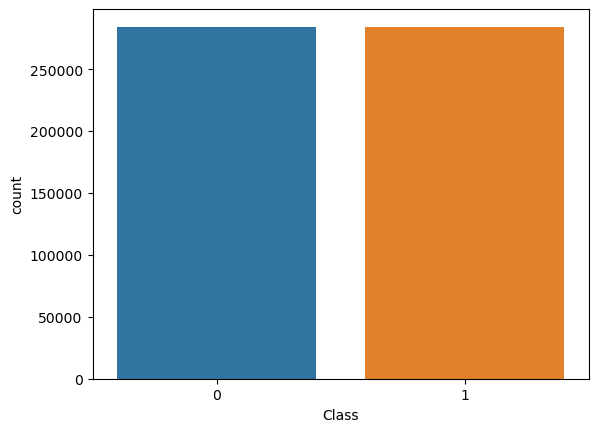

In [16]:
sns.countplot(data=df, x="Class")
plt.show()

### Correlation Matrix

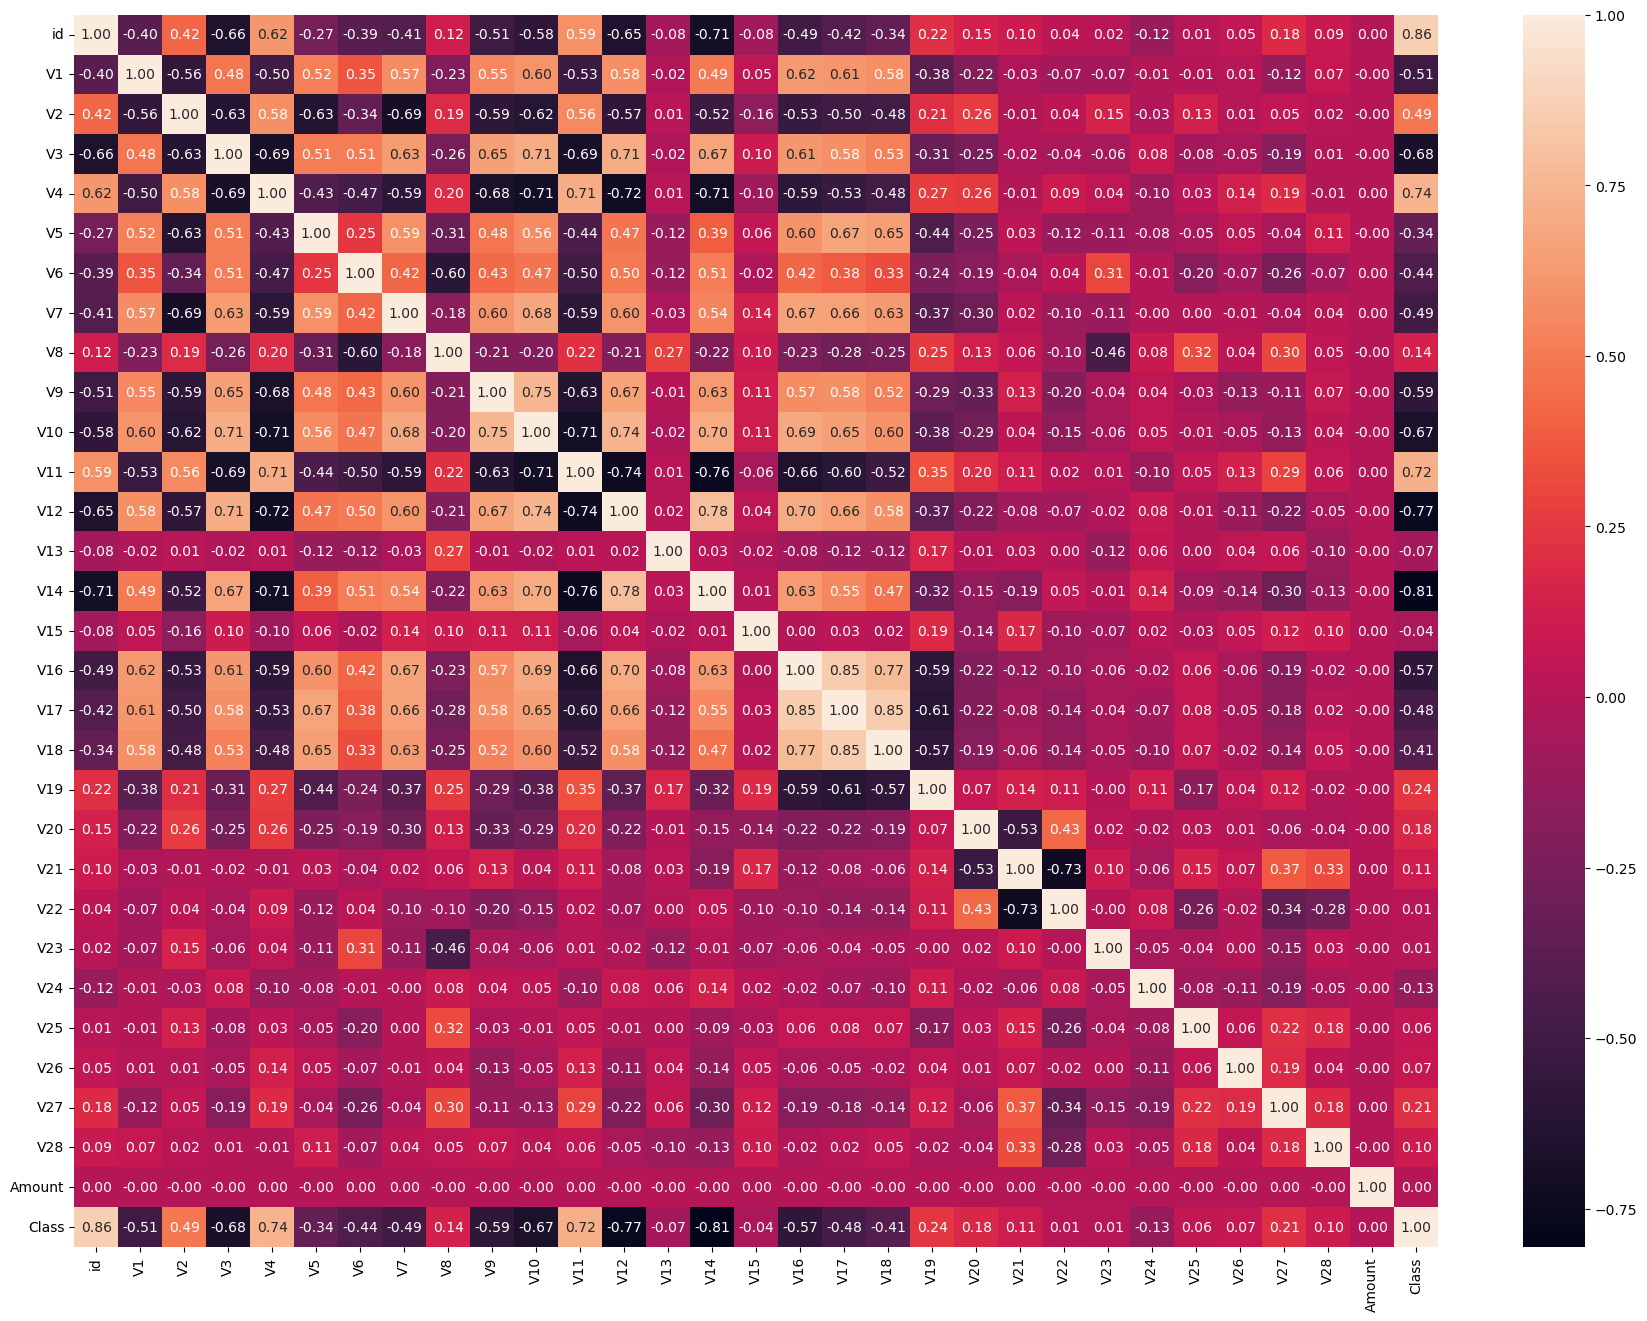

In [17]:
plt.figure(figsize=(22, 16))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Scaling :

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 5: Model Building and Validation

In [41]:
models={

"Logistic Regression":LogisticRegression() ,
"Support Vector Machine":SVC(),
"K-Nearest Neighbors":KNeighborsClassifier(),
"Decision Tree":DecisionTreeRegressor(),
"Random Forest":RandomForestClassifier(),
"Naive Bayes":GaussianNB()

}

In [43]:
for name,model in models.items():
    score = cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
    print(f"{name}: Accuracy Score - {score.mean()},Std Dev - {score.std()}")

Logistic Regression: Accuracy Score - 0.9957499999999999,Std Dev - 0.0018708286933869723
Support Vector Machine: Accuracy Score - 0.9962500000000001,Std Dev - 0.0013693063937629266
K-Nearest Neighbors: Accuracy Score - 0.99075,Std Dev - 0.004000000000000012
Decision Tree: Accuracy Score - 0.999,Std Dev - 0.0004999999999999894
Random Forest: Accuracy Score - 0.9995,Std Dev - 0.0006123724356957815
Naive Bayes: Accuracy Score - 0.9339999999999999,Std Dev - 0.006344288770224737


### From  above output, it is found that Random Forest model has the highest Accuracy score and 
### lowest standard deviation  as compared to other models. 

### It indicates that Random Forest model has better performance and 
### it is the best fitting model for Credit Card Fraud Detection.

In [42]:
for name,model in models.items():
    score = cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
    accuracy = score.mean()
    std = score.std()
    print(f"{model.__class__.__name__}:Accuracy Score -{accuracy:0.4f},Std Dev-{std:0.4f}")

LogisticRegression:Accuracy Score -0.9957,Std Dev-0.0019
SVC:Accuracy Score -0.9963,Std Dev-0.0014
KNeighborsClassifier:Accuracy Score -0.9908,Std Dev-0.0040
DecisionTreeRegressor:Accuracy Score -0.9993,Std Dev-0.0006
RandomForestClassifier:Accuracy Score -0.9995,Std Dev-0.0006
GaussianNB:Accuracy Score -0.9340,Std Dev-0.0063
